In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings

In [61]:
df=pd.read_csv('vehicles2.csv')

df

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white
1,28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue
2,29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red
3,30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red
4,32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263681,426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white
263682,426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red
263683,426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white
263684,426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver


In [62]:
df.isna().sum()

Unnamed: 0      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263686 entries, 0 to 263685
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    263686 non-null  int64  
 1   price         263686 non-null  int64  
 2   year          263686 non-null  float64
 3   manufacturer  263686 non-null  object 
 4   model         263686 non-null  object 
 5   condition     263686 non-null  object 
 6   cylinders     263686 non-null  object 
 7   fuel          263686 non-null  object 
 8   odometer      263686 non-null  float64
 9   title_status  263686 non-null  object 
 10  transmission  263686 non-null  object 
 11  drive         263686 non-null  object 
 12  type          263686 non-null  object 
 13  paint_color   263686 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 28.2+ MB


In [64]:
df.describe()

,Unnamed: 0,price,year,odometer
count,263686.000000,2.636860e+05,263686.000000,2.636860e+05
mean,213375.368586,2.122379e+04,2013.680487,7.849809e+04
std,124558.121730,2.483787e+05,6.040172,7.808279e+04
min,27.000000,0.000000e+00,1900.000000,0.000000e+00
25%,103264.250000,8.400000e+03,2011.000000,2.999200e+04
50%,213330.500000,1.799500e+04,2015.000000,6.936700e+04
75%,321520.750000,2.999000e+04,2018.000000,1.143000e+05
max,426879.000000,1.234568e+08,2022.000000,1.000000e+07


In [65]:
# Visualize outliers with box plots
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

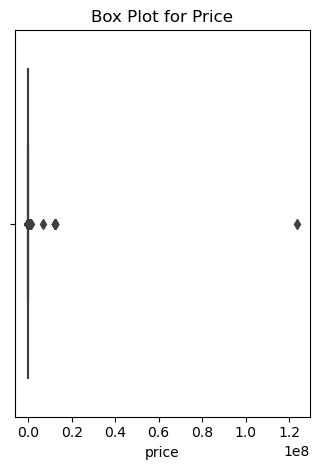

In [66]:
# Box plot for price
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot for Price')
plt.tight_layout()
plt.show()

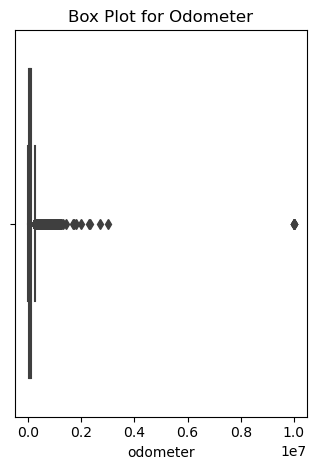

In [67]:
# Box plot for odometer
plt.subplot(1, 2, 2)
sns.boxplot(x=df['odometer'])
plt.title('Box Plot for Odometer')
plt.tight_layout()
plt.show()

In [68]:
# Outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR=Q3-Q1

In [69]:
# Step 3: Determine the outlier bounds
lower_bound = Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

In [70]:
df =df.loc[(df['price']<=200000)&(df['price']>=1000)]

In [71]:
print(df.shape)

(233056, 14)


In [72]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df.loc[(df['odometer']<=500000)&(df['odometer']>=45000)]

print(df.shape)

(146516, 14)


In [73]:
df['year'].unique()

array([2014., 2010., 2012., 2013., 2017., 2015., 2016., 2018., 2008.,
       2007., 2019., 2006., 2002., 2009., 1995., 2011., 1999., 2003.,
       2004., 2005., 1996., 2000., 1997., 1972., 2001., 1998., 1994.,
       1991., 1966., 1951., 1973., 2020., 1987., 1985., 1993., 1988.,
       1989., 1990., 1955., 1992., 1977., 1984., 1968., 1969., 1981.,
       1971., 1978., 1979., 1980., 1975., 1950., 1974., 1956., 1982.,
       1952., 1961., 1986., 1965., 1964., 2021., 1967., 2022., 1970.,
       1957., 1963., 1948., 1976., 1940., 1954., 1983., 1953., 1959.,
       1962., 1949., 1936., 1958., 1947., 1938., 1941., 1937., 1930.,
       1905., 1939., 1935.])

In [74]:
# Calculate the age
current_year = pd.to_datetime('today').year

df['age'] = current_year - df['year']


In [75]:
# calculate the mile avarage
df['Mile_average'] = df['odometer'] / df['age']


In [76]:
df

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average
0,27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,10.0,5792.300000
1,28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,14.0,5087.785714
4,32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,12.0,5724.666667
13,43,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6 cylinders,other,55251.0,clean,other,4wd,pickup,red,10.0,5525.100000
28,61,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8 cylinders,other,80318.0,clean,other,4wd,pickup,white,11.0,7301.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263661,426855,7477,2012.0,fiat,500,good,6 cylinders,gas,64267.0,clean,manual,4wd,hatchback,white,12.0,5355.583333
263662,426856,5477,2003.0,nissan,murano,good,6 cylinders,gas,168055.0,clean,automatic,4wd,SUV,blue,21.0,8002.619048
263670,426864,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,4wd,SUV,black,8.0,6684.375000
263672,426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,8.0,6951.500000


In [77]:
df['Mile_average'].describe()

count    146516.000000
mean       9560.359951
std        3827.948645
min         505.425532
25%        7039.364583
50%        9034.166667
75%       11426.976136
max      103917.000000
Name: Mile_average, dtype: float64

In [78]:
df['Mile_ratings'] = ['above_average' if x > 21500 else 'below_average' for x in df['Mile_average']]

In [79]:
df

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings
0,27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,10.0,5792.300000,below_average
1,28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,14.0,5087.785714,below_average
4,32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,12.0,5724.666667,below_average
13,43,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6 cylinders,other,55251.0,clean,other,4wd,pickup,red,10.0,5525.100000,below_average
28,61,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8 cylinders,other,80318.0,clean,other,4wd,pickup,white,11.0,7301.636364,below_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263661,426855,7477,2012.0,fiat,500,good,6 cylinders,gas,64267.0,clean,manual,4wd,hatchback,white,12.0,5355.583333,below_average
263662,426856,5477,2003.0,nissan,murano,good,6 cylinders,gas,168055.0,clean,automatic,4wd,SUV,blue,21.0,8002.619048,below_average
263670,426864,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,4wd,SUV,black,8.0,6684.375000,below_average
263672,426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,8.0,6951.500000,below_average


In [80]:
df['cylinders']= df['cylinders'].str.extract('(\d+)')[0].astype(float)

In [81]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings
0,27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,4wd,pickup,white,10.0,5792.300000,below_average
1,28,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,4wd,pickup,blue,14.0,5087.785714,below_average
4,32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,pickup,black,12.0,5724.666667,below_average
13,43,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6.0,other,55251.0,clean,other,4wd,pickup,red,10.0,5525.100000,below_average
28,61,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8.0,other,80318.0,clean,other,4wd,pickup,white,11.0,7301.636364,below_average


In [82]:
df.isna().sum()

Unnamed: 0        0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders       309
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
type              0
paint_color       0
age               0
Mile_average      0
Mile_ratings      0
dtype: int64

In [83]:
df.isna().sum()

Unnamed: 0        0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders       309
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
type              0
paint_color       0
age               0
Mile_average      0
Mile_ratings      0
dtype: int64

In [84]:
# Mapping dictionaries for Manufacturer
manufacturer_mapping = {
    'harley-davidson': 'American', 'chevrolet': 'American', 'pontiac': 'American', 'ram': 'American', 
    'ford': 'American', 'gmc': 'American', 'tesla': 'American', 'jeep': 'American', 'dodge': 'American', 
    'cadillac': 'American', 'chrysler': 'American', 'lincoln': 'American', 'buick': 'American', 
    'saturn': 'American', 'mercury': 'American', 
    'lexus': 'Japanese', 'nissan': 'Japanese', 'toyota': 'Japanese', 'acura': 'Japanese', 
    'honda': 'Japanese', 'infiniti': 'Japanese', 'subaru': 'Japanese', 'mitsubishi': 'Japanese', 
    'datsun': 'Japanese', 'mazda': 'Japanese', 
    'volkswagen': 'German', 'mercedes-benz': 'German', 'bmw': 'German', 'audi': 'German', 'porsche': 'German', 
    'ferrari': 'Italian', 'fiat': 'Italian', 'alfa-romeo': 'Italian', 
    'kia': 'Korean', 'hyundai': 'Korean', 
    'volvo': 'Swedish', 
    'rover': 'English', 'mini': 'English', 'land rover': 'English', 'jaguar': 'English'
}

# Mapping dictionaries for type
type_mapping = {
    'sedan': 'Luxury_small', 'convertible': 'Luxury_small', 'coupe': 'Luxury_small', 
    'hatchback': 'Luxury_small', 'other': 'Luxury_small', 
    'SUV': 'luxury_large', 'wagon': 'luxury_large', 
    'pickup': 'non-luxury_small', 'truck': 'non-luxury_small', 'offroad': 'non-luxury_small', 
    'van': 'non-luxury_large', 'mini-van': 'non-luxury_large', 'bus': 'non-luxury_large'
}

# Mapping dictionaries for paint_color
paint_color_mapping = {
    'white': 'light color', 'silver': 'light color', 'yellow': 'light color', 
    'orange': 'light color', 'green': 'light color', 'custom': 'light color', 
    'black': 'dark color', 'red': 'dark color', 'blue': 'dark color', 
    'purple': 'dark color', 'grey': 'dark color', 'brown': 'dark color'
}

# Apply mappings to create new columns
df['Manufacturer_category'] = df['manufacturer'].map(manufacturer_mapping)
df['type'] = df['type'].map(type_mapping)
df['paint_color'] = df['paint_color'].map(paint_color_mapping)

In [85]:
df

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings,Manufacturer_category
0,27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,4wd,non-luxury_small,light color,10.0,5792.300000,below_average,American
1,28,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,4wd,non-luxury_small,dark color,14.0,5087.785714,below_average,American
4,32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,non-luxury_small,dark color,12.0,5724.666667,below_average,American
13,43,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6.0,other,55251.0,clean,other,4wd,non-luxury_small,dark color,10.0,5525.100000,below_average,Japanese
28,61,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8.0,other,80318.0,clean,other,4wd,non-luxury_small,light color,11.0,7301.636364,below_average,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263661,426855,7477,2012.0,fiat,500,good,6.0,gas,64267.0,clean,manual,4wd,Luxury_small,light color,12.0,5355.583333,below_average,Italian
263662,426856,5477,2003.0,nissan,murano,good,6.0,gas,168055.0,clean,automatic,4wd,luxury_large,dark color,21.0,8002.619048,below_average,Japanese
263670,426864,29590,2016.0,toyota,4runner sr5 sport utility,good,6.0,gas,53475.0,clean,automatic,4wd,luxury_large,dark color,8.0,6684.375000,below_average,Japanese
263672,426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,8.0,gas,55612.0,clean,automatic,rwd,Luxury_small,dark color,8.0,6951.500000,below_average,Japanese


In [87]:
df=df.drop('Unnamed: 0', axis=1)

In [88]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings,Manufacturer_category
0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,4wd,non-luxury_small,light color,10.0,5792.300000,below_average,American
1,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,4wd,non-luxury_small,dark color,14.0,5087.785714,below_average,American
4,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,non-luxury_small,dark color,12.0,5724.666667,below_average,American
13,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6.0,other,55251.0,clean,other,4wd,non-luxury_small,dark color,10.0,5525.100000,below_average,Japanese
28,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8.0,other,80318.0,clean,other,4wd,non-luxury_small,light color,11.0,7301.636364,below_average,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263661,7477,2012.0,fiat,500,good,6.0,gas,64267.0,clean,manual,4wd,Luxury_small,light color,12.0,5355.583333,below_average,Italian
263662,5477,2003.0,nissan,murano,good,6.0,gas,168055.0,clean,automatic,4wd,luxury_large,dark color,21.0,8002.619048,below_average,Japanese
263670,29590,2016.0,toyota,4runner sr5 sport utility,good,6.0,gas,53475.0,clean,automatic,4wd,luxury_large,dark color,8.0,6684.375000,below_average,Japanese
263672,32990,2016.0,infiniti,qx80 sport utility 4d,good,8.0,gas,55612.0,clean,automatic,rwd,Luxury_small,dark color,8.0,6951.500000,below_average,Japanese


In [89]:
df.to_csv('vehicles3.csv')